In [1]:
from scipy.stats import gaussian_kde
from signaturizer import Signaturizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import signaturizer
import random
import umap
import os

2025-06-18 12:27:36.888719: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 12:27:36.890288: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-18 12:27:36.915532: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-18 12:27:36.915564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-18 12:27:36.916303: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# # DrugBank
# SMILES_DRUGBANK = sorted(pd.read_csv("./datasets/drugbank_smiles.csv")['Smiles'])

# # ChEMBL
# SMILES_ChEMBL = sorted(pd.read_csv("../synthetic_accessibility/SMILES_ChEMBL_ALL.csv")['smiles'])

# # ChemDiv
# SMILES_CHEMDIV_ANTIINFECTIVE = sorted(pd.read_csv("../data/libraries/antiinfective_smiles.csv")['smiles'])
SMILES_CHEMDIV_GENERALISTIC = sorted(pd.read_csv("../data/libraries/generalistic_smiles.csv")['smiles'])

# Coconut
SMILES_COCONUT = sorted(pd.read_csv("./datasets/coconut_csv-06-2025.csv", low_memory=False)['canonical_smiles'])

In [3]:
N = 10000
random.seed(42)

# Subsampling
# SMILES_DRUGBANK = random.sample(SMILES_DRUGBANK, N)
# SMILES_ChEMBL = random.sample(SMILES_ChEMBL, N)
# SMILES_CHEMDIV_ANTIINFECTIVE = random.sample(SMILES_CHEMDIV_ANTIINFECTIVE, N)
SMILES_CHEMDIV_GENERALISTIC = random.sample(SMILES_CHEMDIV_GENERALISTIC, N)
SMILES_COCONUT = random.sample(SMILES_COCONUT, N)

# # Add up everything
# SMILES = SMILES_DRUGBANK + SMILES_ChEMBL + SMILES_CHEMDIV_ANTIINFECTIVE + SMILES_CHEMDIV_GENERALISTIC
# LABELS = ['DrugBank']*len(SMILES_DRUGBANK) + ['ChEMBL']*len(SMILES_ChEMBL) + ['ChemDiv-Anti']*len(SMILES_CHEMDIV_ANTIINFECTIVE) + ['ChemDiv-Gen']*len(SMILES_CHEMDIV_GENERALISTIC)

# # Print smiles
# with open("./input.csv", "w") as f:
#     f.write('smiles\n')
#     f.write("\n".join(SMILES))

SMILES = SMILES_CHEMDIV_GENERALISTIC + SMILES_COCONUT
LABELS = ['ChemDiv-Gen'] * len(SMILES_CHEMDIV_GENERALISTIC) + ['Coconut'] * len(SMILES_COCONUT)

In [4]:
sign = Signaturizer('A1')
results = sign.predict(SMILES, drop_invalid=False).signature

# Remove nans
results_, labels_ = [], []
for i,j in zip(results, LABELS):
    if np.isnan(i).all() == False:
        results_.append(i)
        labels_.append(j)

RESULTS, LABELS = np.array(results_), np.array(labels_)

Parsing SMILES: 20000it [00:02, 7586.21it/s]
Generating signatures:   0%|          | 0/157 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


Generating signatures:   1%|          | 1/157 [00:00<00:35,  4.39it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:   1%|▏         | 2/157 [00:00<00:26,  5.78it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:   2%|▏         | 3/157 [00:00<00:24,  6.38it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:   3%|▎         | 4/157 [00:00<00:23,  6.44it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:   3%|▎         | 5/157 [00:00<00:22,  6.83it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:   4%|▍         | 6/157 [00:00<00:21,  7.08it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:   4%|▍         | 7/157 [00:01<00:20,  7.36it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:   5%|▌         | 8/157 [00:01<00:19,  7.56it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:   6%|▌         | 9/157 [00:01<00:19,  7.66it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:   6%|▋         | 10/157 [00:01<00:19,  7.73it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:   7%|▋         | 11/157 [00:01<00:19,  7.47it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:   8%|▊         | 12/157 [00:01<00:19,  7.37it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:   8%|▊         | 13/157 [00:01<00:19,  7.20it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:   9%|▉         | 14/157 [00:01<00:19,  7.28it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  10%|▉         | 15/157 [00:02<00:19,  7.47it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  10%|█         | 16/157 [00:02<00:18,  7.48it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  11%|█         | 17/157 [00:02<00:18,  7.58it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  11%|█▏        | 18/157 [00:02<00:18,  7.61it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  12%|█▏        | 19/157 [00:02<00:19,  7.21it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  13%|█▎        | 20/157 [00:02<00:18,  7.24it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  13%|█▎        | 21/157 [00:02<00:19,  7.05it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  14%|█▍        | 22/157 [00:03<00:18,  7.23it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  15%|█▍        | 23/157 [00:03<00:18,  7.39it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  15%|█▌        | 24/157 [00:03<00:17,  7.51it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  16%|█▌        | 25/157 [00:03<00:18,  7.19it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  17%|█▋        | 26/157 [00:03<00:19,  6.70it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  17%|█▋        | 27/157 [00:03<00:18,  6.86it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  18%|█▊        | 28/157 [00:03<00:18,  7.14it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  18%|█▊        | 29/157 [00:04<00:17,  7.32it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  19%|█▉        | 30/157 [00:04<00:17,  7.22it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  20%|█▉        | 31/157 [00:04<00:17,  7.30it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  20%|██        | 32/157 [00:04<00:16,  7.47it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  21%|██        | 33/157 [00:04<00:16,  7.49it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  22%|██▏       | 34/157 [00:04<00:16,  7.43it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  22%|██▏       | 35/157 [00:04<00:16,  7.44it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  23%|██▎       | 36/157 [00:04<00:16,  7.47it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  24%|██▎       | 37/157 [00:05<00:15,  7.55it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  24%|██▍       | 38/157 [00:05<00:17,  6.65it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  25%|██▍       | 39/157 [00:05<00:17,  6.80it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  25%|██▌       | 40/157 [00:05<00:16,  7.08it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  26%|██▌       | 41/157 [00:05<00:16,  7.13it/s]

1/1 [==============================] - 0s 44ms/step


Generating signatures:  27%|██▋       | 42/157 [00:05<00:17,  6.51it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  27%|██▋       | 43/157 [00:06<00:16,  6.72it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  28%|██▊       | 44/157 [00:06<00:16,  6.99it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  29%|██▊       | 45/157 [00:06<00:15,  7.09it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  29%|██▉       | 46/157 [00:06<00:16,  6.92it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  30%|██▉       | 47/157 [00:06<00:15,  7.06it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  31%|███       | 48/157 [00:06<00:14,  7.32it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  31%|███       | 49/157 [00:06<00:14,  7.46it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  32%|███▏      | 50/157 [00:06<00:13,  7.66it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  32%|███▏      | 51/157 [00:07<00:13,  7.60it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  33%|███▎      | 52/157 [00:07<00:13,  7.66it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  34%|███▍      | 53/157 [00:07<00:13,  7.46it/s]

1/1 [==============================] - 0s 24ms/step


Generating signatures:  34%|███▍      | 54/157 [00:07<00:14,  7.25it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  35%|███▌      | 55/157 [00:07<00:14,  7.12it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  36%|███▌      | 56/157 [00:07<00:14,  7.18it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  36%|███▋      | 57/157 [00:07<00:13,  7.32it/s]

1/1 [==============================] - 0s 30ms/step


Generating signatures:  37%|███▋      | 58/157 [00:08<00:14,  7.01it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  38%|███▊      | 59/157 [00:08<00:13,  7.02it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  38%|███▊      | 60/157 [00:08<00:14,  6.91it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  39%|███▉      | 61/157 [00:08<00:13,  6.89it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  39%|███▉      | 62/157 [00:08<00:13,  7.11it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  40%|████      | 63/157 [00:08<00:13,  7.05it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  41%|████      | 64/157 [00:08<00:13,  7.10it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  41%|████▏     | 65/157 [00:09<00:12,  7.27it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  42%|████▏     | 66/157 [00:09<00:12,  7.12it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  43%|████▎     | 67/157 [00:09<00:12,  7.24it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  43%|████▎     | 68/157 [00:09<00:12,  7.41it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  44%|████▍     | 69/157 [00:09<00:11,  7.43it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  45%|████▍     | 70/157 [00:09<00:12,  7.24it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  45%|████▌     | 71/157 [00:09<00:12,  7.16it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  46%|████▌     | 72/157 [00:10<00:11,  7.17it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  46%|████▋     | 73/157 [00:10<00:11,  7.22it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  47%|████▋     | 74/157 [00:10<00:12,  6.91it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  48%|████▊     | 75/157 [00:10<00:11,  7.05it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  48%|████▊     | 76/157 [00:10<00:11,  7.13it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  49%|████▉     | 77/157 [00:10<00:11,  7.13it/s]

1/1 [==============================] - 0s 33ms/step


Generating signatures:  50%|████▉     | 78/157 [00:10<00:11,  6.73it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  50%|█████     | 79/157 [00:11<00:11,  6.87it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  51%|█████     | 80/157 [00:11<00:11,  6.97it/s]

1/1 [==============================] - 0s 28ms/step


Generating signatures:  52%|█████▏    | 81/157 [00:11<00:15,  5.01it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  52%|█████▏    | 82/157 [00:11<00:13,  5.56it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  53%|█████▎    | 83/157 [00:11<00:12,  6.12it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  54%|█████▎    | 84/157 [00:11<00:11,  6.39it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  54%|█████▍    | 85/157 [00:12<00:11,  6.53it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  55%|█████▍    | 86/157 [00:12<00:10,  6.51it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  55%|█████▌    | 87/157 [00:12<00:10,  6.83it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  56%|█████▌    | 88/157 [00:12<00:10,  6.86it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  57%|█████▋    | 89/157 [00:12<00:10,  6.78it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  57%|█████▋    | 90/157 [00:12<00:09,  6.98it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  58%|█████▊    | 91/157 [00:12<00:09,  6.69it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  59%|█████▊    | 92/157 [00:13<00:09,  6.98it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  59%|█████▉    | 93/157 [00:13<00:08,  7.14it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  60%|█████▉    | 94/157 [00:13<00:08,  7.24it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  61%|██████    | 95/157 [00:13<00:08,  7.21it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  61%|██████    | 96/157 [00:13<00:08,  7.34it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  62%|██████▏   | 97/157 [00:13<00:08,  7.32it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  62%|██████▏   | 98/157 [00:13<00:08,  7.37it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  63%|██████▎   | 99/157 [00:14<00:07,  7.32it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  64%|██████▎   | 100/157 [00:14<00:07,  7.40it/s]

1/1 [==============================] - 0s 15ms/step


Generating signatures:  64%|██████▍   | 101/157 [00:14<00:07,  7.46it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  65%|██████▍   | 102/157 [00:14<00:07,  7.40it/s]

1/1 [==============================] - 0s 24ms/step


Generating signatures:  66%|██████▌   | 103/157 [00:14<00:07,  6.99it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  66%|██████▌   | 104/157 [00:14<00:07,  6.93it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  67%|██████▋   | 105/157 [00:14<00:07,  7.14it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  68%|██████▊   | 106/157 [00:14<00:07,  7.20it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  68%|██████▊   | 107/157 [00:15<00:06,  7.32it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  69%|██████▉   | 108/157 [00:15<00:06,  7.18it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  69%|██████▉   | 109/157 [00:15<00:06,  7.08it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  70%|███████   | 110/157 [00:15<00:06,  7.19it/s]

1/1 [==============================] - 0s 28ms/step


Generating signatures:  71%|███████   | 111/157 [00:15<00:06,  6.92it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  71%|███████▏  | 112/157 [00:15<00:06,  7.05it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  72%|███████▏  | 113/157 [00:15<00:06,  7.17it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  73%|███████▎  | 114/157 [00:16<00:05,  7.33it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  73%|███████▎  | 115/157 [00:16<00:05,  7.32it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  74%|███████▍  | 116/157 [00:16<00:05,  7.25it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  75%|███████▍  | 117/157 [00:16<00:05,  7.36it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  75%|███████▌  | 118/157 [00:16<00:05,  7.42it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  76%|███████▌  | 119/157 [00:16<00:05,  7.42it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  76%|███████▋  | 120/157 [00:16<00:05,  7.10it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  77%|███████▋  | 121/157 [00:17<00:05,  6.89it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  78%|███████▊  | 122/157 [00:17<00:05,  6.85it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  78%|███████▊  | 123/157 [00:17<00:04,  6.83it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  79%|███████▉  | 124/157 [00:17<00:04,  7.01it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  80%|███████▉  | 125/157 [00:17<00:04,  7.12it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  80%|████████  | 126/157 [00:17<00:04,  6.90it/s]

1/1 [==============================] - 0s 27ms/step


Generating signatures:  81%|████████  | 127/157 [00:18<00:04,  6.08it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  82%|████████▏ | 128/157 [00:18<00:04,  6.40it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  82%|████████▏ | 129/157 [00:18<00:04,  6.50it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  83%|████████▎ | 130/157 [00:18<00:04,  6.63it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  83%|████████▎ | 131/157 [00:18<00:03,  6.65it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  84%|████████▍ | 132/157 [00:18<00:03,  6.88it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  85%|████████▍ | 133/157 [00:18<00:03,  7.03it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  85%|████████▌ | 134/157 [00:19<00:03,  7.19it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  86%|████████▌ | 135/157 [00:19<00:03,  7.26it/s]

1/1 [==============================] - 0s 21ms/step


Generating signatures:  87%|████████▋ | 136/157 [00:19<00:03,  6.98it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  87%|████████▋ | 137/157 [00:19<00:03,  6.56it/s]

1/1 [==============================] - 0s 26ms/step


Generating signatures:  88%|████████▊ | 138/157 [00:19<00:02,  6.38it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  89%|████████▊ | 139/157 [00:19<00:02,  6.69it/s]

1/1 [==============================] - 0s 28ms/step


Generating signatures:  89%|████████▉ | 140/157 [00:19<00:02,  6.69it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  90%|████████▉ | 141/157 [00:20<00:02,  6.55it/s]

1/1 [==============================] - 0s 19ms/step


Generating signatures:  90%|█████████ | 142/157 [00:20<00:02,  6.67it/s]

1/1 [==============================] - 0s 25ms/step


Generating signatures:  91%|█████████ | 143/157 [00:20<00:02,  6.49it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  92%|█████████▏| 144/157 [00:20<00:01,  6.69it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  92%|█████████▏| 145/157 [00:20<00:01,  6.65it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  93%|█████████▎| 146/157 [00:20<00:01,  6.68it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  94%|█████████▎| 147/157 [00:20<00:01,  6.90it/s]

1/1 [==============================] - 0s 18ms/step


Generating signatures:  94%|█████████▍| 148/157 [00:21<00:01,  6.97it/s]

1/1 [==============================] - 0s 20ms/step


Generating signatures:  95%|█████████▍| 149/157 [00:21<00:01,  6.98it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  96%|█████████▌| 150/157 [00:21<00:01,  6.98it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  96%|█████████▌| 151/157 [00:21<00:00,  7.04it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  97%|█████████▋| 152/157 [00:21<00:00,  7.20it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  97%|█████████▋| 153/157 [00:21<00:00,  7.33it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  98%|█████████▊| 154/157 [00:21<00:00,  7.14it/s]

1/1 [==============================] - 0s 16ms/step


Generating signatures:  99%|█████████▊| 155/157 [00:22<00:00,  7.22it/s]

1/1 [==============================] - 0s 17ms/step


Generating signatures:  99%|█████████▉| 156/157 [00:22<00:00,  6.59it/s]

1/1 [==============================] - 0s 34ms/step


Generating signatures: 100%|██████████| 157/157 [00:22<00:00,  7.00it/s]


In [5]:
# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(RESULTS)
print("PCA done!")

# tSNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=8)
X_tsne = tsne.fit_transform(RESULTS)
print("tSNE done!")

# umap
umap_model = umap.UMAP(n_components=2, random_state=42, n_jobs=8)
X_umap = umap_model.fit_transform(RESULTS)
print("UMAP done!")

PCA done!
tSNE done!


/home/acomajuncosa/miniconda3/envs/ai2050-h3d/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/acomajuncosa/miniconda3/envs/ai2050-h3d/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP done!


In [9]:
def coords_to_size_by_density(x, y, min_size=1, max_size=50):
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)
    norm_density = (density - density.min()) / (density.max() - density.min())
    size = min_size + norm_density * (max_size - min_size)
    return norm_density, size

In [10]:
# sts = ['pca', 'tsne', 'umap']
# dataset_to_color = {'DrugBank': 'blue', 'ChEMBL': "red", 'ChemDiv-Anti': 'green', 'ChemDiv-Gen': 'purple'}

# fig, ax = plt.subplots(1, 3, figsize=(13, 4))

# for c, st in enumerate(sts):
    
#     x = results[st + "_1"]
#     y = results[st + "_2"]
#     density, size = coords_to_size_by_density(x, y)
#     colors = [dataset_to_color[i] for i in results['label']]

#     ax[c].scatter(x, y, s=size, c=colors)
#     ax[c].set_xticks([])
#     ax[c].set_yticks([])
#     ax[c].set_xlabel(st + "-1", labelpad=11)
#     ax[c].set_ylabel(st + "-2", labelpad=11)
#     ax[c].set_title(st.upper() if st != 'tsne' else 'tSNE', pad=12, size=12)

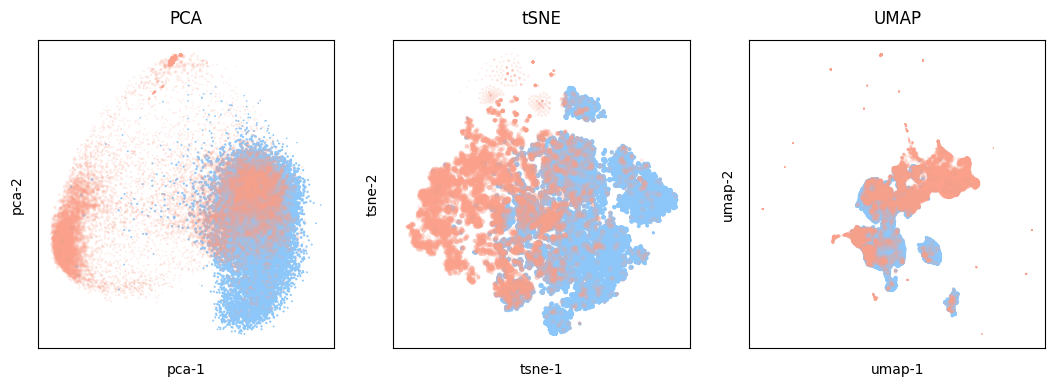

In [15]:
sts = ['pca', 'tsne', 'umap']
# dataset_to_color = {'DrugBank': '#50285A', 'ChEMBL': "#FAA08B", 'ChemDiv-Anti': '#AA96FA', 'ChemDiv-Gen': '#8DC7FA'}
dataset_to_color = {'Coconut': "#FAA08B", 'ChemDiv-Gen': '#8DC7FA'}

fig, ax = plt.subplots(1, 3, figsize=(13, 4))

for c, (X, st) in enumerate(zip([X_pca, X_tsne, X_umap], sts)):
    
    x = X[:,0]
    y = X[:,1]
    density, size = coords_to_size_by_density(x, y, min_size=1, max_size=20)
    colors = [dataset_to_color[i] for i in LABELS]

    ax[c].scatter(x, y, s=size, c=colors, alpha=[0.2 if i == 'Coconut' else 1 for i in LABELS], lw=0)
    ax[c].set_xticks([])
    ax[c].set_yticks([])
    ax[c].set_xlabel(st + "-1", labelpad=10)
    ax[c].set_ylabel(st + "-2", labelpad=10)
    ax[c].set_title(st.upper() if st != 'tsne' else 'tSNE', pad=12, size=12)

plt.savefig("./dimred.png", dpi=300)